# EDA Homework 1
**By:** Jiahui Jin, Flora Chen

**Date:** Aug 31, 2020

## Exercise 1

### 1. List five analytics queries or questions that you would have about this dataset in your exploratory process.

* Which cereals top the list in each of the macronutrient categories (carbohydrates, protein, fat)?
* What cereal provides the most calorie per weight unit?
* What are the top 5 best ranked cereals?
* What’s the average product ranking for each manufacturer?
* What features affect rating the most? I.e. What's the correlation value between each numerical feature and ranking?

### 2. Describe 5 visualizations that can help you explore this data. (Example: line graph between variable x and y).

* Bar chart of average ranking by manufacturer
* Scatterplot of product x=calorie, y=(protein or fat or other nutrition index) 
* Bar chart of product with top 5 highest calorie amount
* Bar chart of all product rankings sorted from highest to lowest
* Correlation matrix heatmap of numerical features against rating

### 3. What other data would be helpful to prepare your presentation? What do you think is your boss’s goal?

*Boss's goal:* select a cereal product that’s nutritious, some what palatable, and cost effective.

*Information that helps evaluate cost effectiveness:*
* The school district’s budget
* Price per weight unit of product
* Shipment fees and other logistic costs - another aspect to factor into purchasing cost

*Information that helps evaluate nutritional value:*
* Average recommended daily calorie intake per student -  serves as benchmark for minimal cereal nutrition requirements
* Food allergies among students - cereals with common food allergens should be avoided to better serve the student bodyy 

*Information that helps evaluate taste:*
* What kinds of cereals do students eat at home - helps narrow down taste preferences that may be specific to this age group.

### 4. Assume that after a long exploratory data analysis you reach a recommendation for your boss (make assumptions as needed). Provide a one-sentence “big idea.”

“Purchase x cereal to provide a nutritious, tasty, and affordable breakfast for students to better focus in class.”

### 5. Create a storyboard for your presentation.
*Actionable/big idea:*
* “Purchase x cereal to provide a nutritious, tasty, affordable breakfast option for students.”

*Issue:*
* School district cafeterias currently lack breakfast options (or lack affordable ones).
* School starts early, and some students skip eating breakfast at home, while many low-income students aren’t able to afford breakfast.
* Breakfast is an important meal, skipping it has caused many students to experience energy slumps and health issues, both which distract them from focusing in class. 

*Demo:*
* Student interview, where a few key phrases are highlighted, such as being unable to afford breakfast.
* Survey results such as 80% of the students feel they are unable to focus in class due not eating breakfast.

*Solution:*
* The school district purchases cereal at scale to provide nutritious, tasty, and affordable breakfast for students.

*Data to highlight why our recommended brand is the best:*
* Briefly go over the evaluation criteria for nutritious value, affordability, and taste.
* Present top 5 best-performing cereal products in terms of our 3 evaluation areas.
	* E.g. for taste, show a bar graph of top 5 most well ranked cereals

*Highlight recommendation:*
* Synthesize data from the above section, leading to one specific, recommended product.

## Exercise 2
### Three visulizations for US child mortality rate

In [5]:
# import all required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('usa_mortality_rates.csv')

In [3]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,USA,"Mortality rate, under-5 (per 1,000 live births)",SH.DYN.MORT,30.1,29.5,28.9,28.3,27.7,27.1,...,7.3,7.2,7.1,7,6.9,6.8,6.7,6.6,6.5,NaN


In [193]:
# reduce table to show only yearly mortality rates columns
df_yr = df.filter(regex='\d+', axis=1).drop('2019', axis=1)

# x-axis presents years
x = df_yr.columns
# y-axis presents mortality rates
y = df_yr.values.flatten()


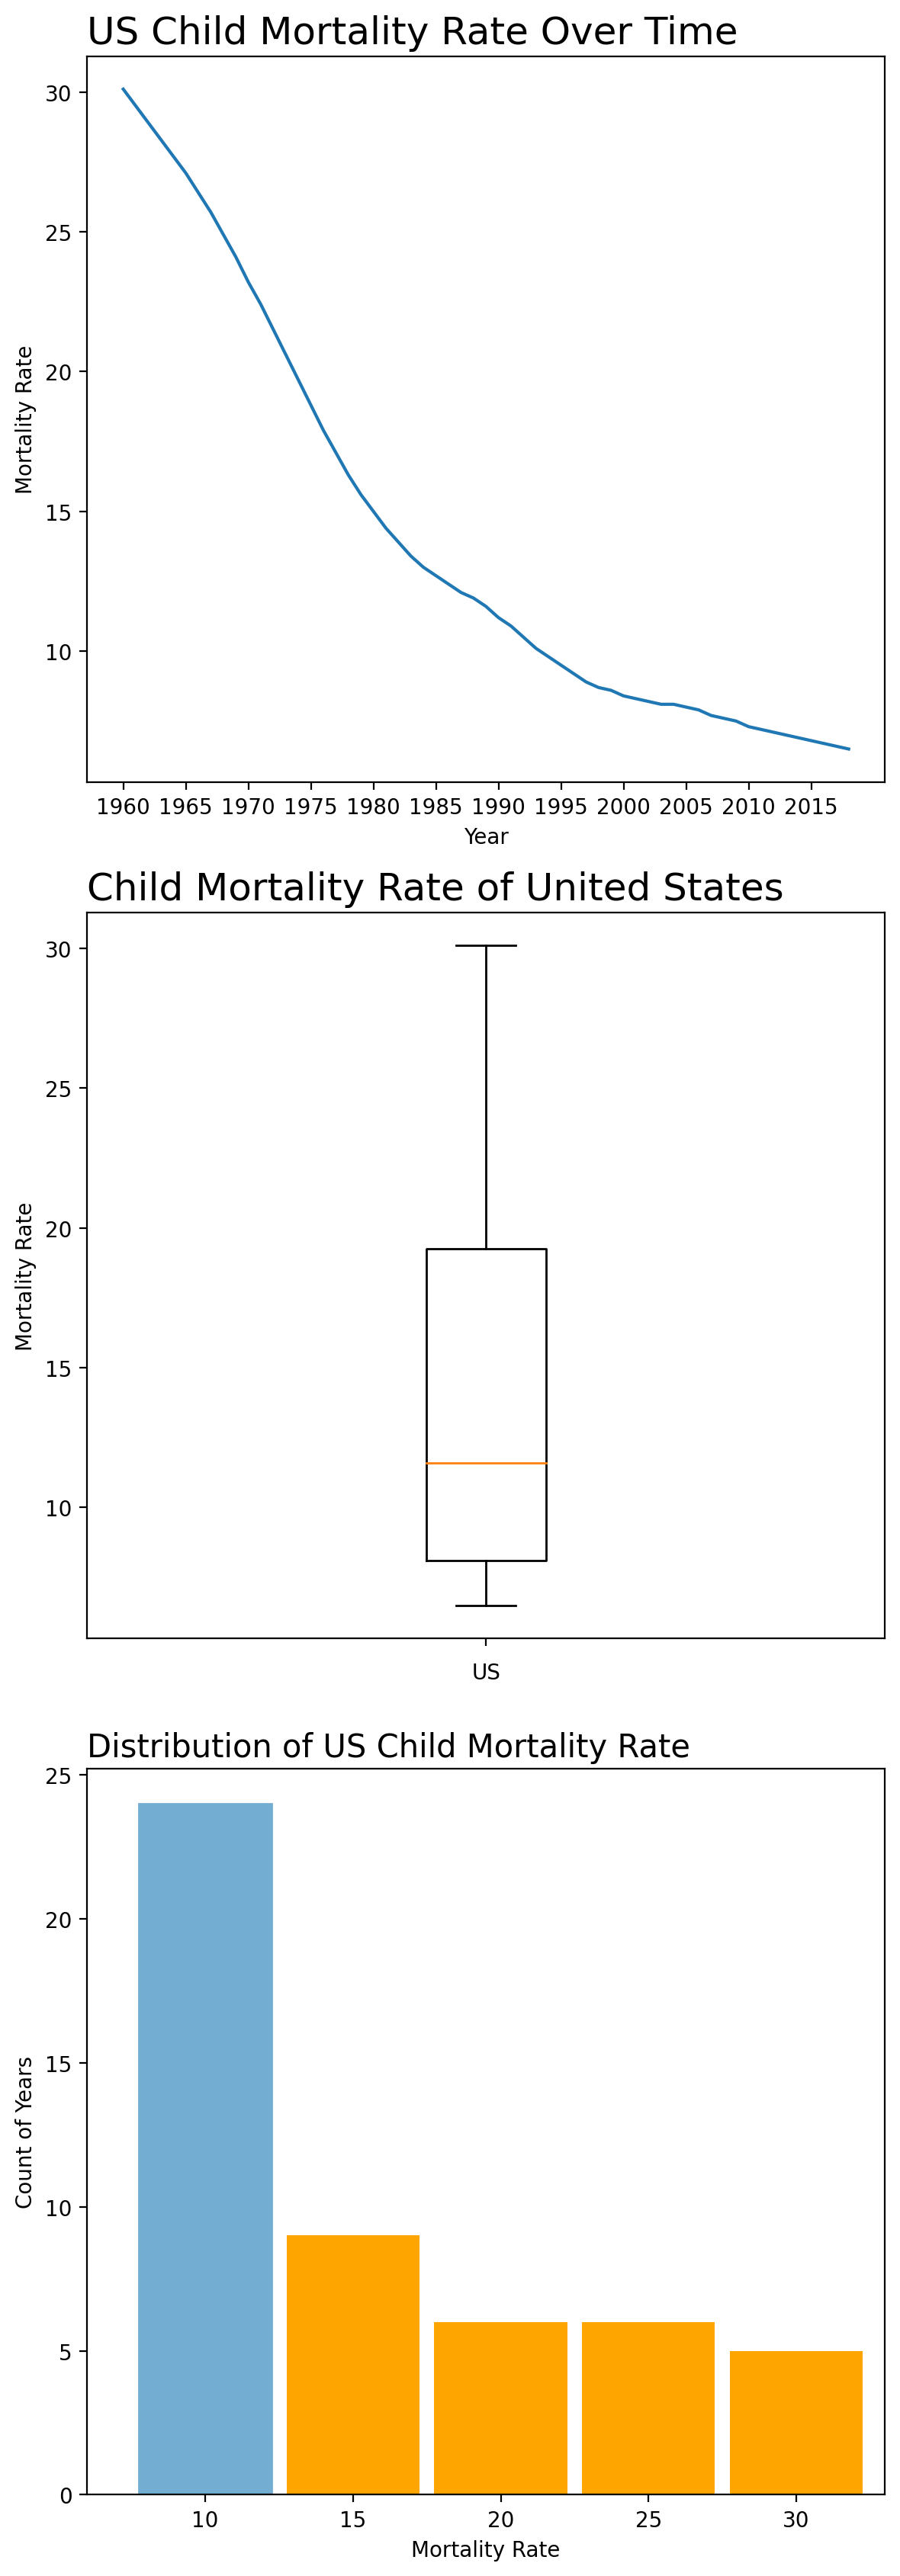

In [211]:
# set up chart figures and arrangement
fig, axes = plt.subplots(3,1, figsize=(6,17))

ax = axes.flatten()


for i in range(len(ax)):
    if i == 0:
        ax[i].plot(x, y)
        ax[i].set_xticks(x[0::5])
        ax[i].set_xlabel('Year')
        ax[i].set_ylabel('Mortality Rate')
        ax[i].set_title('US Child Mortality Rate Over Time',loc='left', fontsize=18)
        
    elif i == 1:
        ax[i].boxplot(y)
        ax[i].set_xticklabels([''])
        ax[i].set_ylabel('Mortality Rate')
        ax[i].set_xlabel('US')
        ax[i].set_title('Child Mortality Rate of United States',loc='left', fontsize=18)
        
    elif i ==2:
        n, bins, patches = ax[i].hist(y, bins=np.array([10,15,20,25,30,35])-2.5, rwidth=.9, color='orange')
        ax[i].set_title('Distribution of US Child Mortality Rate',loc='left', fontsize=15)
        ax[i].set_ylabel('Count of Years')
        ax[i].set_xlabel('Mortality Rate')
        ax[i].set_xlim(6, 33)
        
        # highlight highest count bin       
        patches[0].set_color('#73ADD2')
        
plt.tight_layout()                 
plt.show()


## Exercise 3

In [184]:
# create data
data  = [['Peers', .85, .91],
         ['Culture', .8, .96],
         ['Work environment', .76, .75],
         ['Leadership', .59, .62],
         ['Career development', .49, .33],
         ['Rewards & recognition', .41, .45],
         ['Perf management', .33, .42]]


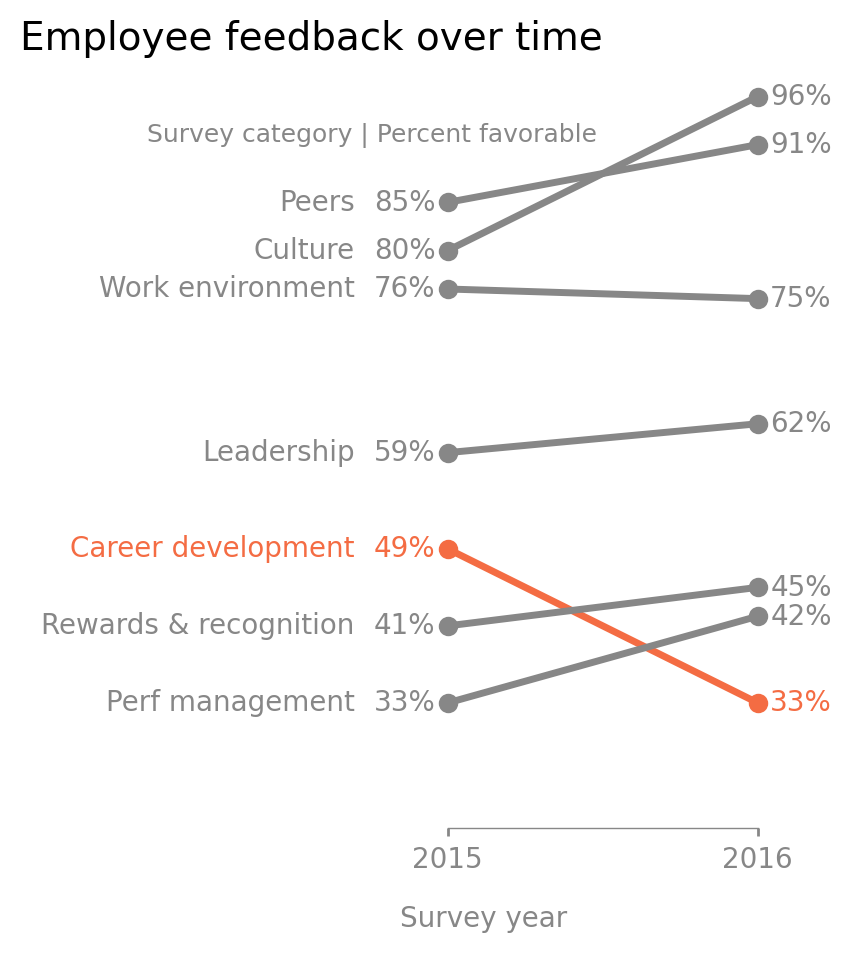

In [203]:
fig, ax = plt.subplots(figsize=(2.4,5))

# Let's use 0 as the left-hand side and 1 as the right-hand side
# (below we will set labels to 2015 for 0 and 2016 for 1)
ax.set_xlim(0-.1,1+.1)
ax.set_ylim(0.2,1)

# Draw lines and text associated with employee feedback category
for c,a,b in data:
    color = ('#F46C43' if c=='Career development' else '#878787')
    ax.plot([0,1], [a,b], 'o-', lw=2.5, c=color)
    ax.text(0-.04, a, f"{a*100:.0f}%", color=color,
            horizontalalignment='right', verticalalignment='center')
    ax.text(1+.04, b, f"{b*100:.0f}%", color=color,
            horizontalalignment='left', verticalalignment='center')
    ax.text(-0.3, a, c, color=color, 
            horizontalalignment='right', verticalalignment='center')

# Set title font, color, alignment, and content
ax.text(0.5, 1.02, 'Employee feedback over time', color='black', size=14,
            horizontalalignment='right', verticalalignment='center')

# Set y-axis font, color, alignment, and content
ax.text(0.48, 0.92, 'Survey category | Percent favorable', color='#878787', size=9,
            horizontalalignment='right', verticalalignment='center')

# adjust x-axis
ax.spines['bottom'].set_bounds(0, 1)
ax.set_xticks([0,1])
ax.set_xticklabels(['2015','2016'], color='#878787')
ax.set_yticks([])
ax.xaxis.label.set_color('#878787')
ax.tick_params(direction='out', length=3, width=1, colors='#878787',
                   grid_color='r', grid_alpha=0.5)
ax.set_xlabel('Survey year')
ax.xaxis.set_label_coords(0.18, -0.1)


# Only show the bottom axis
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(.5)
ax.spines['bottom'].set_color('#878787')



plt.show()